# Continuous Empirical Distributions

An `empirical distribution` function provides a way to model and sample cumulative probabilities for a data sample that does not fit a standard probability distribution.

It is called the empirical cumulative distribution function, or ECDF for short.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid");

## Calculating the Empirical Distribution Function of an arbitrary Continuous Distribution

In [2]:
from scipy.stats import norm

### Generating a bimodal distribution

Generating sample1

In [3]:
sample1 = norm.rvs(size=400, loc=30, scale=5)

Plotting sample1

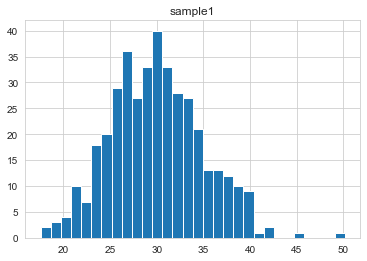

In [4]:
plt.title('sample1')
plt.hist(sample1, bins=30);

Generating sample2 

In [5]:
sample2 = norm.rvs(size=700, loc=50, scale=5)

Plotting sample2

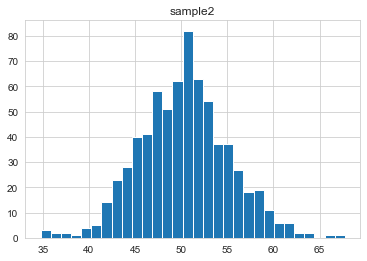

In [6]:
plt.title('sample2')
plt.hist(sample2, bins=30);

Joining both samples

In [7]:
sample = np.hstack((sample1,sample2))

In [8]:
# Remember...
a = [1,2,3]
b = [4,5,6]
np.hstack((a,b))

array([1, 2, 3, 4, 5, 6])

Plotting sample

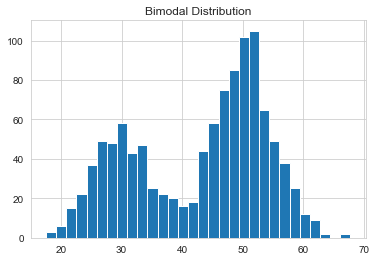

In [9]:
plt.title('Bimodal Distribution')
plt.hist(sample, bins=30);

Using seaborn:

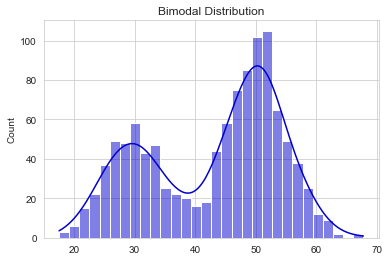

In [10]:
ax = sns.histplot(x=sample, bins=30, kde=True, color='mediumblue')
ax.set_title('Bimodal Distribution');

This is a plot of the probability density function (PDF) of this data sample.

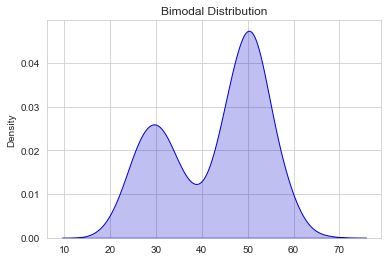

In [11]:
ax = sns.kdeplot(x=sample, shade=True, color='mediumblue')
ax.set_title('Bimodal Distribution');

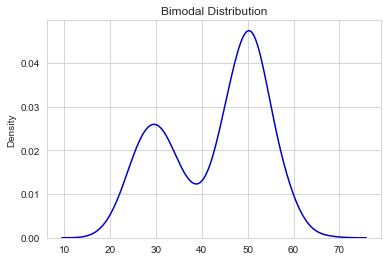

In [12]:
ax = sns.kdeplot(x=sample, color='mediumblue')
ax.set_title('Bimodal Distribution');

### Calculate the Empirical Distribution Function

An `empirical distribution function` can be fit for a data sample in Python.
The statmodels Python library provides the ECDF class for fitting an empirical cumulative distribution function.

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
ecdf = ECDF(sample)

In [15]:
type(ecdf)

statsmodels.distributions.empirical_distribution.ECDF

### Plotting the Cumulative Distribution

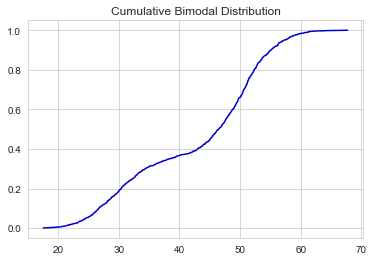

In [16]:
plt.plot(ecdf.x, ecdf.y, color='mediumblue')
plt.title('Cumulative Bimodal Distribution');

Calculating the domain of the empirical cumulative distribution function `ecdf`:

In [17]:
print('Domain of ecdf: (%.2f, %.2f)' %(min(ecdf.x), max(ecdf.x)))

Domain of ecdf: (-inf, 67.74)


### Using the Empirical distribution function to calculate probabilities

In [18]:
print('P(x<10) = %.3f' % ecdf(10))

P(x<10) = 0.000


In [19]:
print('P(x < 20) = %.3f' % ecdf(20))
print('P(x > 20) = %.3f' %(1-ecdf(20)))

P(x < 20) = 0.005
P(x > 20) = 0.995


In [20]:
print('P(x < 30) = %.3f' % ecdf(30))
print('P(x > 30) = %.3f' %(1-ecdf(30)))

P(x < 30) = 0.186
P(x > 30) = 0.814


In [21]:
print('P(x < 60) = %.3f' % ecdf(60))
print('P(x > 60) = %.3f' %(1-ecdf(60)))

P(x < 60) = 0.984
P(x > 60) = 0.016


In [22]:
print('P(x < 70) = %.3f' % ecdf(70))

P(x < 70) = 1.000


### Generating Random Numbers from the distribution

In [23]:
from scipy.stats import uniform

Generating 1000 values with uniform distribution in `[0,1]`

In [24]:
unif = uniform.rvs(size=1000, loc = 0, scale=1)

In [25]:
print('Uniform values: (%.4f, %.4f)' %(min(unif), max(unif)))

Uniform values: (0.0008, 0.9983)


Using the uniform values to generate new random values of our ecdf:

In [26]:
idx = [np.argmax(ecdf.y >= unif[i]) for i in range(len(unif))]

In [27]:
new_sample = [ecdf.x[idx[i]] for i in range(len(unif))]

In [28]:
print('New generated values: (%.4f, %.4f)' %(min(new_sample), max(new_sample)))

New generated values: (17.5424, 66.4093)


### Plotting simulated data

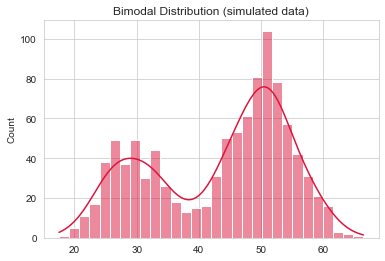

In [29]:
ax = sns.histplot(x=new_sample, bins=30, kde=True, color='crimson')
ax.set_title('Bimodal Distribution (simulated data)');

### Plotting original and generated data

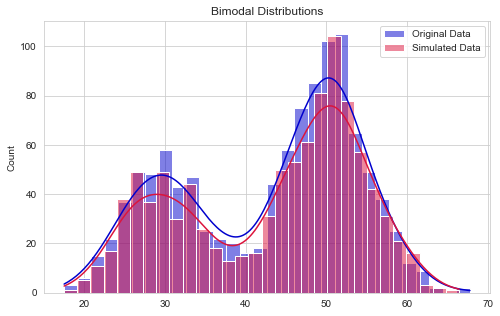

In [30]:
plt.figure(figsize=(8,5))
ax = sns.histplot(x=sample, bins=30, kde=True, color='mediumblue', label='Original Data')
ax = sns.histplot(x=new_sample, bins=30, kde=True, color='crimson', label='Simulated Data')
plt.legend()
ax.set_title('Bimodal Distributions');

Changing the `bin` parameter

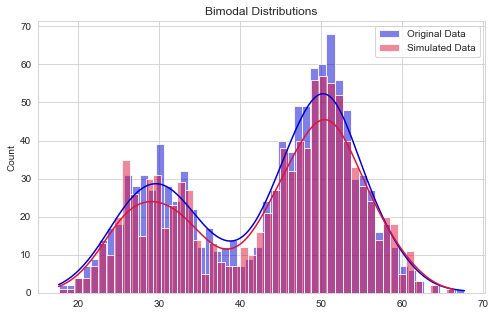

In [31]:
plt.figure(figsize=(8,5))
ax = sns.histplot(x=sample, bins=50, kde=True, color='mediumblue', label='Original Data')
ax = sns.histplot(x=new_sample, bins=50, kde=True, color='crimson', label='Simulated Data')
plt.legend()
ax.set_title('Bimodal Distributions');

Plotting the probability density functions

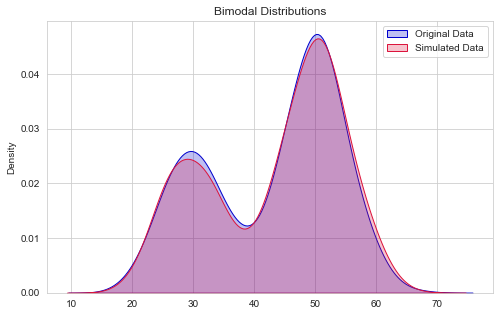

In [32]:
plt.figure(figsize=(8,5))
ax = sns.kdeplot(x=sample, shade=True, color='mediumblue', label='Original Data')
ax = sns.kdeplot(x=new_sample, shade=True, color='crimson', label='Simulated Data')
plt.legend()
ax.set_title('Bimodal Distributions');

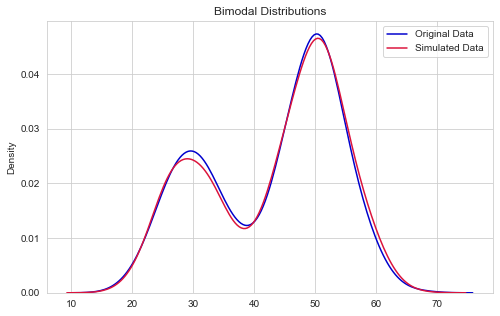

In [33]:
plt.figure(figsize=(8,5))
ax = sns.kdeplot(x=sample, color='mediumblue', label='Original Data')
ax = sns.kdeplot(x=new_sample, color='crimson', label='Simulated Data')
plt.legend()
ax.set_title('Bimodal Distributions');

### Calculating the new ecdf

In [34]:
new_ecdf = ECDF(new_sample)

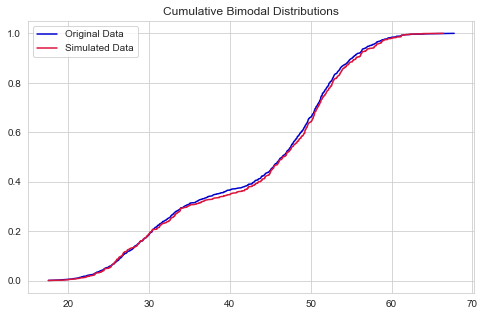

In [35]:
plt.figure(figsize=(8,5))
plt.plot(ecdf.x, ecdf.y, color='mediumblue', label='Original Data')
plt.plot(new_ecdf.x, new_ecdf.y, color='crimson', label='Simulated Data')
plt.legend()
plt.title('Cumulative Bimodal Distributions');